IMPLEMENT WITH SKLEARN

In [1]:
!gdown 18YfCgT3Rk7uYWrUzgjb2UR3Nyo9Z68bK

Downloading...
From: https://drive.google.com/uc?id=18YfCgT3Rk7uYWrUzgjb2UR3Nyo9Z68bK
To: /content/titanic.csv
100% 60.3k/60.3k [00:00<00:00, 45.2MB/s]


In [2]:
from IPython.display import clear_output

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [40]:
#load data
titanic_data = pd.read_csv('titanic.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


1.   choose basic information
2.   try polynomial
1.   find crucial feature






1 choose basic information

In [62]:
# 'Fare' and 'cabin' both indicate the level of wealth, so I choose one of them
info_interest = ['Survived','Pclass','Sex','Age','SibSp','Parch','Cabin'] #'Survived','Pclass','Sex','Age','SibSp','Parch','cabin'
data_interst = titanic_data[info_interest]

2 try polynomial

In [63]:
# data process
# regarding 'Pclass', 'Age' and 'Sex' as dominant features, if there is NaN, just remove it
# cabin(NaN here might have extra inforamtion instead of just being a loss)
if 'Cabin' in info_interest:
  data_interst['Cabin'] = data_interst['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)

data_cleaned = data_interst.dropna()  #remove nan
data = data_cleaned.replace({'Sex': {'male': 1, 'female': 0}})  #replace with number

#divide into feature and label
x = data.drop(['Survived'], axis=1)
y = data['Survived']

# Polynomial
'''
from sklearn.preprocessing import PolynomialFeatures
degree = 1
poly = PolynomialFeatures(degree)
x = poly.fit_transform(x)
'''

#normalization
scaler = MinMaxScaler()
x_normalized = pd.DataFrame(scaler.fit_transform(x))
x_normalized

<ipython-input-63-d51c8dbce39c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_interst['Cabin'] = data_interst['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)


,0,1,2,3,4,5
0,1.0,1.0,0.271174,0.2,0.000000,0.0
1,0.0,0.0,0.472229,0.2,0.000000,1.0
2,1.0,0.0,0.321438,0.0,0.000000,0.0
3,0.0,0.0,0.434531,0.2,0.000000,1.0
4,1.0,1.0,0.434531,0.0,0.000000,0.0
...,...,...,...,...,...,...
709,1.0,0.0,0.484795,0.0,0.833333,0.0
710,0.5,1.0,0.334004,0.0,0.000000,0.0
711,0.0,0.0,0.233476,0.0,0.000000,1.0
712,0.0,1.0,0.321438,0.0,0.000000,1.0


In [64]:
# make indices consistent
y = y.reset_index(drop=True)
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
709,0
710,0
711,1
712,1


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [66]:
#split dataset
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=42)

In [80]:
# create model
model = LogisticRegression()

# train on train_data
model.fit(x_train, y_train)

LogisticRegression()

In [81]:
# predict on test_data
y_pred = model.predict(x_test)

# evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy:.4f}")

# more features ×-> better performance

accuracy: 0.7552


3 find crucial feature

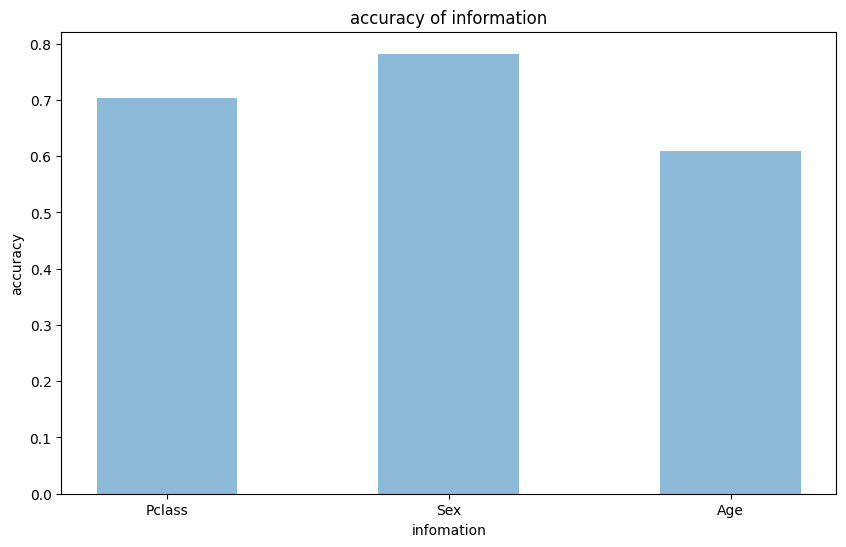

In [30]:
# one by one
import numpy as np

info = ["Pclass", "Sex", "Age"]
accuracy = [0.7039, 0.7821, 0.6084]

width = 0.5

plt.figure(figsize=(10, 6))

# draw bar
plt.bar(info, accuracy, width, label='accuracy',alpha=0.5)

plt.xlabel('infomation')
plt.ylabel('accuracy')
plt.title('accuracy of information')

plt.show()


In [72]:
# coefficients
coefficients = model.coef_[0]
feature_importance = pd.Series(coefficients, index=x.columns)

print("coefficients:")
print(feature_importance.sort_values(ascending=False))


#p-value
import statsmodels.api as sm
x_train_with_const = sm.add_constant(x_train)
logit_model = sm.Logit(y_train, x_train_with_const)
result = logit_model.fit()
print("\n"+"p-value:")
print(result.summary())

coefficients:
Cabin     0.842203
Parch    -0.293763
SibSp    -0.974812
Pclass   -1.562885
Age      -2.492099
Sex      -2.565101
dtype: float64
Optimization terminated successfully.
         Current function value: 0.427152
         Iterations 6

p-value:
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  571
Model:                          Logit   Df Residuals:                      564
Method:                           MLE   Df Model:                            6
Date:                Fri, 09 Aug 2024   Pseudo R-squ.:                  0.3689
Time:                        22:17:51   Log-Likelihood:                -243.90
converged:                       True   LL-Null:                       -386.45
Covariance Type:            nonrobust   LLR p-value:                 1.281e-58
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------

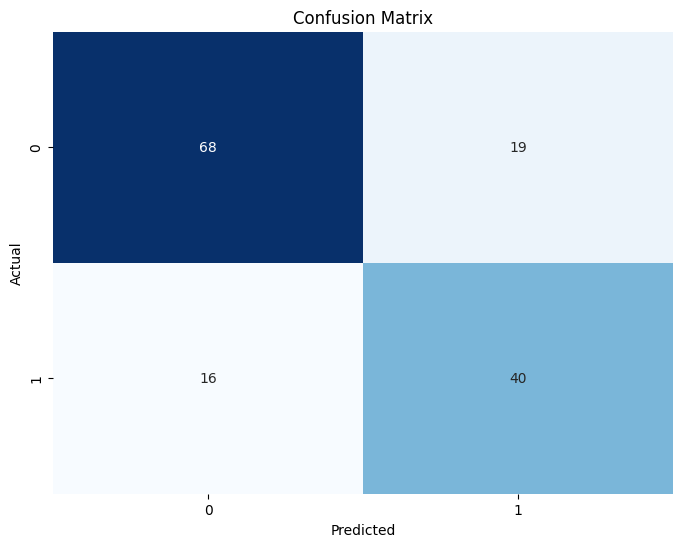

In [73]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

IMPLEMENT FROM SCRATCH

In [74]:
import math
from copy import deepcopy

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [75]:
def sigmoid(z):
    """
    Apply sigmoid function. Sigmoid brings the output in 0 to 1 range
    """
    return 1 / (1 + np.exp(-z))


def log_reg_cost(y, y_pred):  # cross entropy
    """
    Calculates and returns the cost for logistic regression.

    Function is slightly different from mentioned above because this one handles batched/vector/multiple inputs (rather than just one).
    This function sums and takes average across the vector.
    """
    epsilon = 1e-15
    # y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    cost = -1/len(y) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    # cost = np.sum(-y * np.log(y_pred+epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))/len(y)
    return cost


def log_reg_gradient_descent(X, y, learning_rate, n_iters=500):
    """
    Runs gradient descent (param optimization) for logistic regression and returns optimized weights.
    """
    m, n = X.shape
    theta = np.zeros(n)

    losses = []

    for _ in tqdm(range(n_iters)):
        z = np.dot(X, theta)
        y_pred = sigmoid(z)
        gradient = np.dot(X.T, (y_pred - y)) / m
        theta -= learning_rate * gradient

        loss = log_reg_cost(y, y_pred)
        losses.append(loss)

    plt.plot(losses)

    return theta

In [76]:
print(f'Current x_train shape: {x_train.shape}')

intercept_col = np.ones(x_train.shape[0])  # a column of 1's for intercept value
x_train = np.column_stack((x_train, intercept_col))
intercept_col2 = np.ones(x_test.shape[0])
x_test = np.column_stack((x_test, intercept_col2))

print(f'New x_train shape: {x_train.shape}. Extra col added for intercept value')

Current x_train shape: (571, 6)
New x_train shape: (571, 7). Extra col added for intercept value


100%|██████████| 30000/30000 [00:21<00:00, 1405.22it/s]


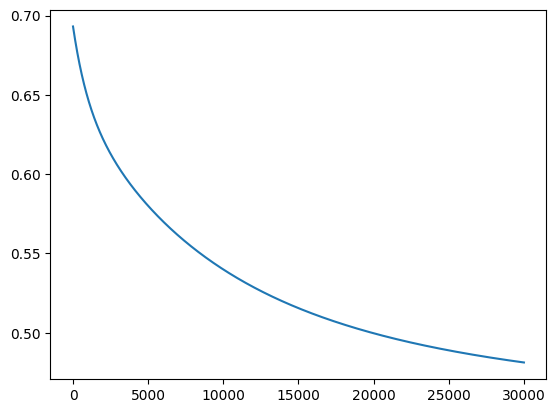

In [77]:
# Run Optimization

num_iters = 30000
lr = 1e-3

theta = log_reg_gradient_descent(x_train, y_train, lr, num_iters)

In [78]:
theta

array([-0.50809075, -1.69023397, -0.14962266,  0.01520638,  0.13201191,
        0.94833923,  0.66683262])

In [79]:
y_pred = sigmoid(np.dot(x_test, theta))  # output of sigmoid is in range 0-1
y_pred = np.round(y_pred)  # round to 0 or 1

correct_mask = (y_pred == y_test)
correct_count = correct_mask.sum()
total_count = len(y_pred)

print(f'The model predicted {correct_count} out of {total_count} predictions correctly')
print(f'The Accuracy is {correct_count/total_count} ({correct_count/total_count*100}%)')

The model predicted 105 out of 143 predictions correctly
The Accuracy is 0.7342657342657343 (73.42657342657343%)
